<a href="https://colab.research.google.com/github/Amadou794545/Risque_de_credit/blob/main/risqueV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/credit-risk-dataset


In [ ]:
import os

print(os.listdir('/root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1'))


['credit_risk_dataset.csv']


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1/credit_risk_dataset.csv', delimiter=',')
df.dataframeName = 'credit-risk-dataset'
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


le projet consiste à determiné lors de la demande de pret si l individu aura ou pas un pret

* person_age = age
* person_income = revenu annuel
* person_home_ownership = Accès à la propriété
* person_emp_length = Durée de l'emploi (en années)
* loan_intent = intention du pret
* loan_grade = note de pret
* loan_amnt = montant du pret
* loan_int_rate = taux d'interet
* loan_status = **statut du pret**
* loan_percent_income = Pourcentage de revenu
* cb_person_default_on_file = Défaut historique
* cb_preson_cred_hist_length = Durée de l'historique de crédit



#Nettoyage & EDA

<Axes: >

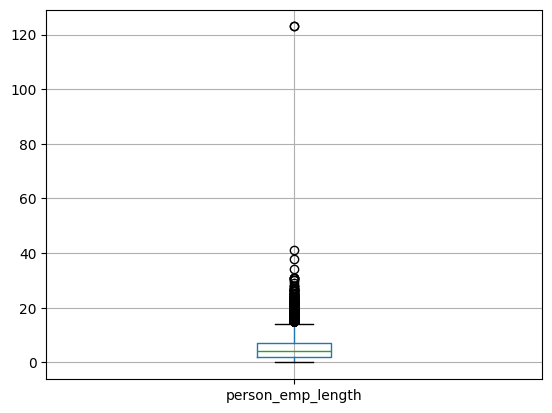

In [ ]:
df[["person_emp_length"]].boxplot()

In [ ]:
df[df.person_emp_length > 30]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
30914,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,9000,14.54,0,0.13,N,17
31866,47,178000,OWN,31.0,VENTURE,B,9000,10.99,0,0.05,N,17
31867,46,180000,MORTGAGE,31.0,VENTURE,B,18000,9.91,0,0.10,N,11
32263,46,180000,MORTGAGE,31.0,MEDICAL,B,18000,9.91,0,0.10,N,12
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32428,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,Y,24
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,N,23


In [ ]:
df = df.drop(df[df.person_emp_length > 100].index)

In [ ]:
df.person_emp_length.value_counts()

,count
person_emp_length,
0.0,4105
2.0,3849
3.0,3456
5.0,2946
1.0,2915
4.0,2874
6.0,2666
7.0,2196
8.0,1687


In [ ]:
df.loan_status.value_counts()

,count
loan_status,
0,25472
1,7107


In [ ]:
df.loan_grade.value_counts()

,count
loan_grade,
A,10776
B,10451
C,6458
D,3625
E,964
F,241
G,64


In [ ]:
df.loan_status.value_counts()

,count
loan_status,
0,25472
1,7107


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32579 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32579 non-null  int64  
 1   person_income               32579 non-null  int64  
 2   person_home_ownership       32579 non-null  object 
 3   person_emp_length           31684 non-null  float64
 4   loan_intent                 32579 non-null  object 
 5   loan_grade                  32579 non-null  object 
 6   loan_amnt                   32579 non-null  int64  
 7   loan_int_rate               29463 non-null  float64
 8   loan_status                 32579 non-null  int64  
 9   loan_percent_income         32579 non-null  float64
 10  cb_person_default_on_file   32579 non-null  object 
 11  cb_person_cred_hist_length  32579 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
df[df.loan_int_rate.isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [ ]:
df.loan_int_rate.value_counts().sort_index()

,count
loan_int_rate,
5.42,594
5.79,395
5.99,358
6.00,12
6.03,448
...,...
21.74,5
22.06,1
22.11,3


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
features_missing = df.columns[df.isnull().any()]
numerical_features_missing = df[features_missing].select_dtypes(include=np.number)

numerical_features_missing

,person_emp_length,loan_int_rate
1,5.0,11.14
2,1.0,12.87
3,4.0,15.23
4,8.0,14.27
5,2.0,7.14
...,...,...
32576,1.0,13.16
32577,4.0,7.49
32578,3.0,10.99
32579,5.0,11.48


In [ ]:
imputer = KNNImputer(n_neighbors=5)
features_not_missing = imputer.fit_transform(numerical_features_missing)

In [ ]:
pd.DataFrame(features_not_missing, columns=numerical_features_missing.columns)

,person_emp_length,loan_int_rate
0,5.0,11.14
1,1.0,12.87
2,4.0,15.23
3,8.0,14.27
4,2.0,7.14
...,...,...
32574,1.0,13.16
32575,4.0,7.49
32576,3.0,10.99
32577,5.0,11.48


In [ ]:
df = df.drop(columns=numerical_features_missing.columns)

In [ ]:
df = pd.concat([df, pd.DataFrame(features_not_missing, columns=numerical_features_missing.columns)], axis=1)

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length,loan_int_rate
1,21.0,9600.0,OWN,EDUCATION,B,1000.0,0.0,0.10,N,2.0,1.0,12.87
2,25.0,9600.0,MORTGAGE,MEDICAL,C,5500.0,1.0,0.57,N,3.0,4.0,15.23
3,23.0,65500.0,RENT,MEDICAL,C,35000.0,1.0,0.53,N,2.0,8.0,14.27
4,24.0,54400.0,RENT,MEDICAL,C,35000.0,1.0,0.55,Y,4.0,2.0,7.14
5,21.0,9900.0,OWN,VENTURE,A,2500.0,1.0,0.25,N,2.0,8.0,12.42


In [ ]:
df.isnull().sum()

,0
person_age,2
person_income,2
person_home_ownership,2
loan_intent,2
loan_grade,2
loan_amnt,2
loan_status,2
loan_percent_income,2
cb_person_default_on_file,2
cb_person_cred_hist_length,2


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_status,0
loan_percent_income,0
cb_person_default_on_file,0
cb_person_cred_hist_length,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32577 entries, 1 to 32578
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32577 non-null  float64
 1   person_income               32577 non-null  float64
 2   person_home_ownership       32577 non-null  object 
 3   loan_intent                 32577 non-null  object 
 4   loan_grade                  32577 non-null  object 
 5   loan_amnt                   32577 non-null  float64
 6   loan_status                 32577 non-null  float64
 7   loan_percent_income         32577 non-null  float64
 8   cb_person_default_on_file   32577 non-null  object 
 9   cb_person_cred_hist_length  32577 non-null  float64
 10  person_emp_length           32577 non-null  float64
 11  loan_int_rate               32577 non-null  float64
dtypes: float64(8), object(4)
memory usage: 3.2+ MB


In [ ]:
df.loan_status = df.loan_status.astype(object)

In [ ]:
df[df.person_emp_length > 30]

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_emp_length,loan_int_rate
30912,36.0,70000.0,MORTGAGE,DEBTCONSOLIDATION,A,6000.0,0.0,0.09,N,16.0,31.0,14.54
31864,38.0,175000.0,MORTGAGE,VENTURE,B,10000.0,0.0,0.06,N,17.0,31.0,10.99
31865,44.0,140787.0,MORTGAGE,MEDICAL,D,35000.0,1.0,0.21,Y,15.0,31.0,9.91
32261,37.0,46680.0,MORTGAGE,VENTURE,D,8000.0,0.0,0.17,N,15.0,31.0,9.91
32353,51.0,37200.0,RENT,MEDICAL,B,3000.0,1.0,0.08,N,30.0,41.0,7.51
32426,66.0,40000.0,RENT,EDUCATION,E,7000.0,1.0,0.17,Y,29.0,34.0,13.55
32513,52.0,100000.0,OWN,PERSONAL,B,10000.0,0.0,0.10,N,25.0,38.0,9.88


In [ ]:
features_cat = df.select_dtypes(include='object')
features_cat.head()

,person_home_ownership,loan_intent,loan_grade,loan_status,cb_person_default_on_file
1,OWN,EDUCATION,B,0.0,N
2,MORTGAGE,MEDICAL,C,1.0,N
3,RENT,MEDICAL,C,1.0,N
4,RENT,MEDICAL,C,1.0,Y
5,OWN,VENTURE,A,1.0,N


In [ ]:
features_num = df.select_dtypes(include=np.number)
features_num.head()

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length,person_emp_length,loan_int_rate
1,21.0,9600.0,1000.0,0.10,2.0,1.0,12.87
2,25.0,9600.0,5500.0,0.57,3.0,4.0,15.23
3,23.0,65500.0,35000.0,0.53,2.0,8.0,14.27
4,24.0,54400.0,35000.0,0.55,4.0,2.0,7.14
5,21.0,9900.0,2500.0,0.25,2.0,8.0,12.42


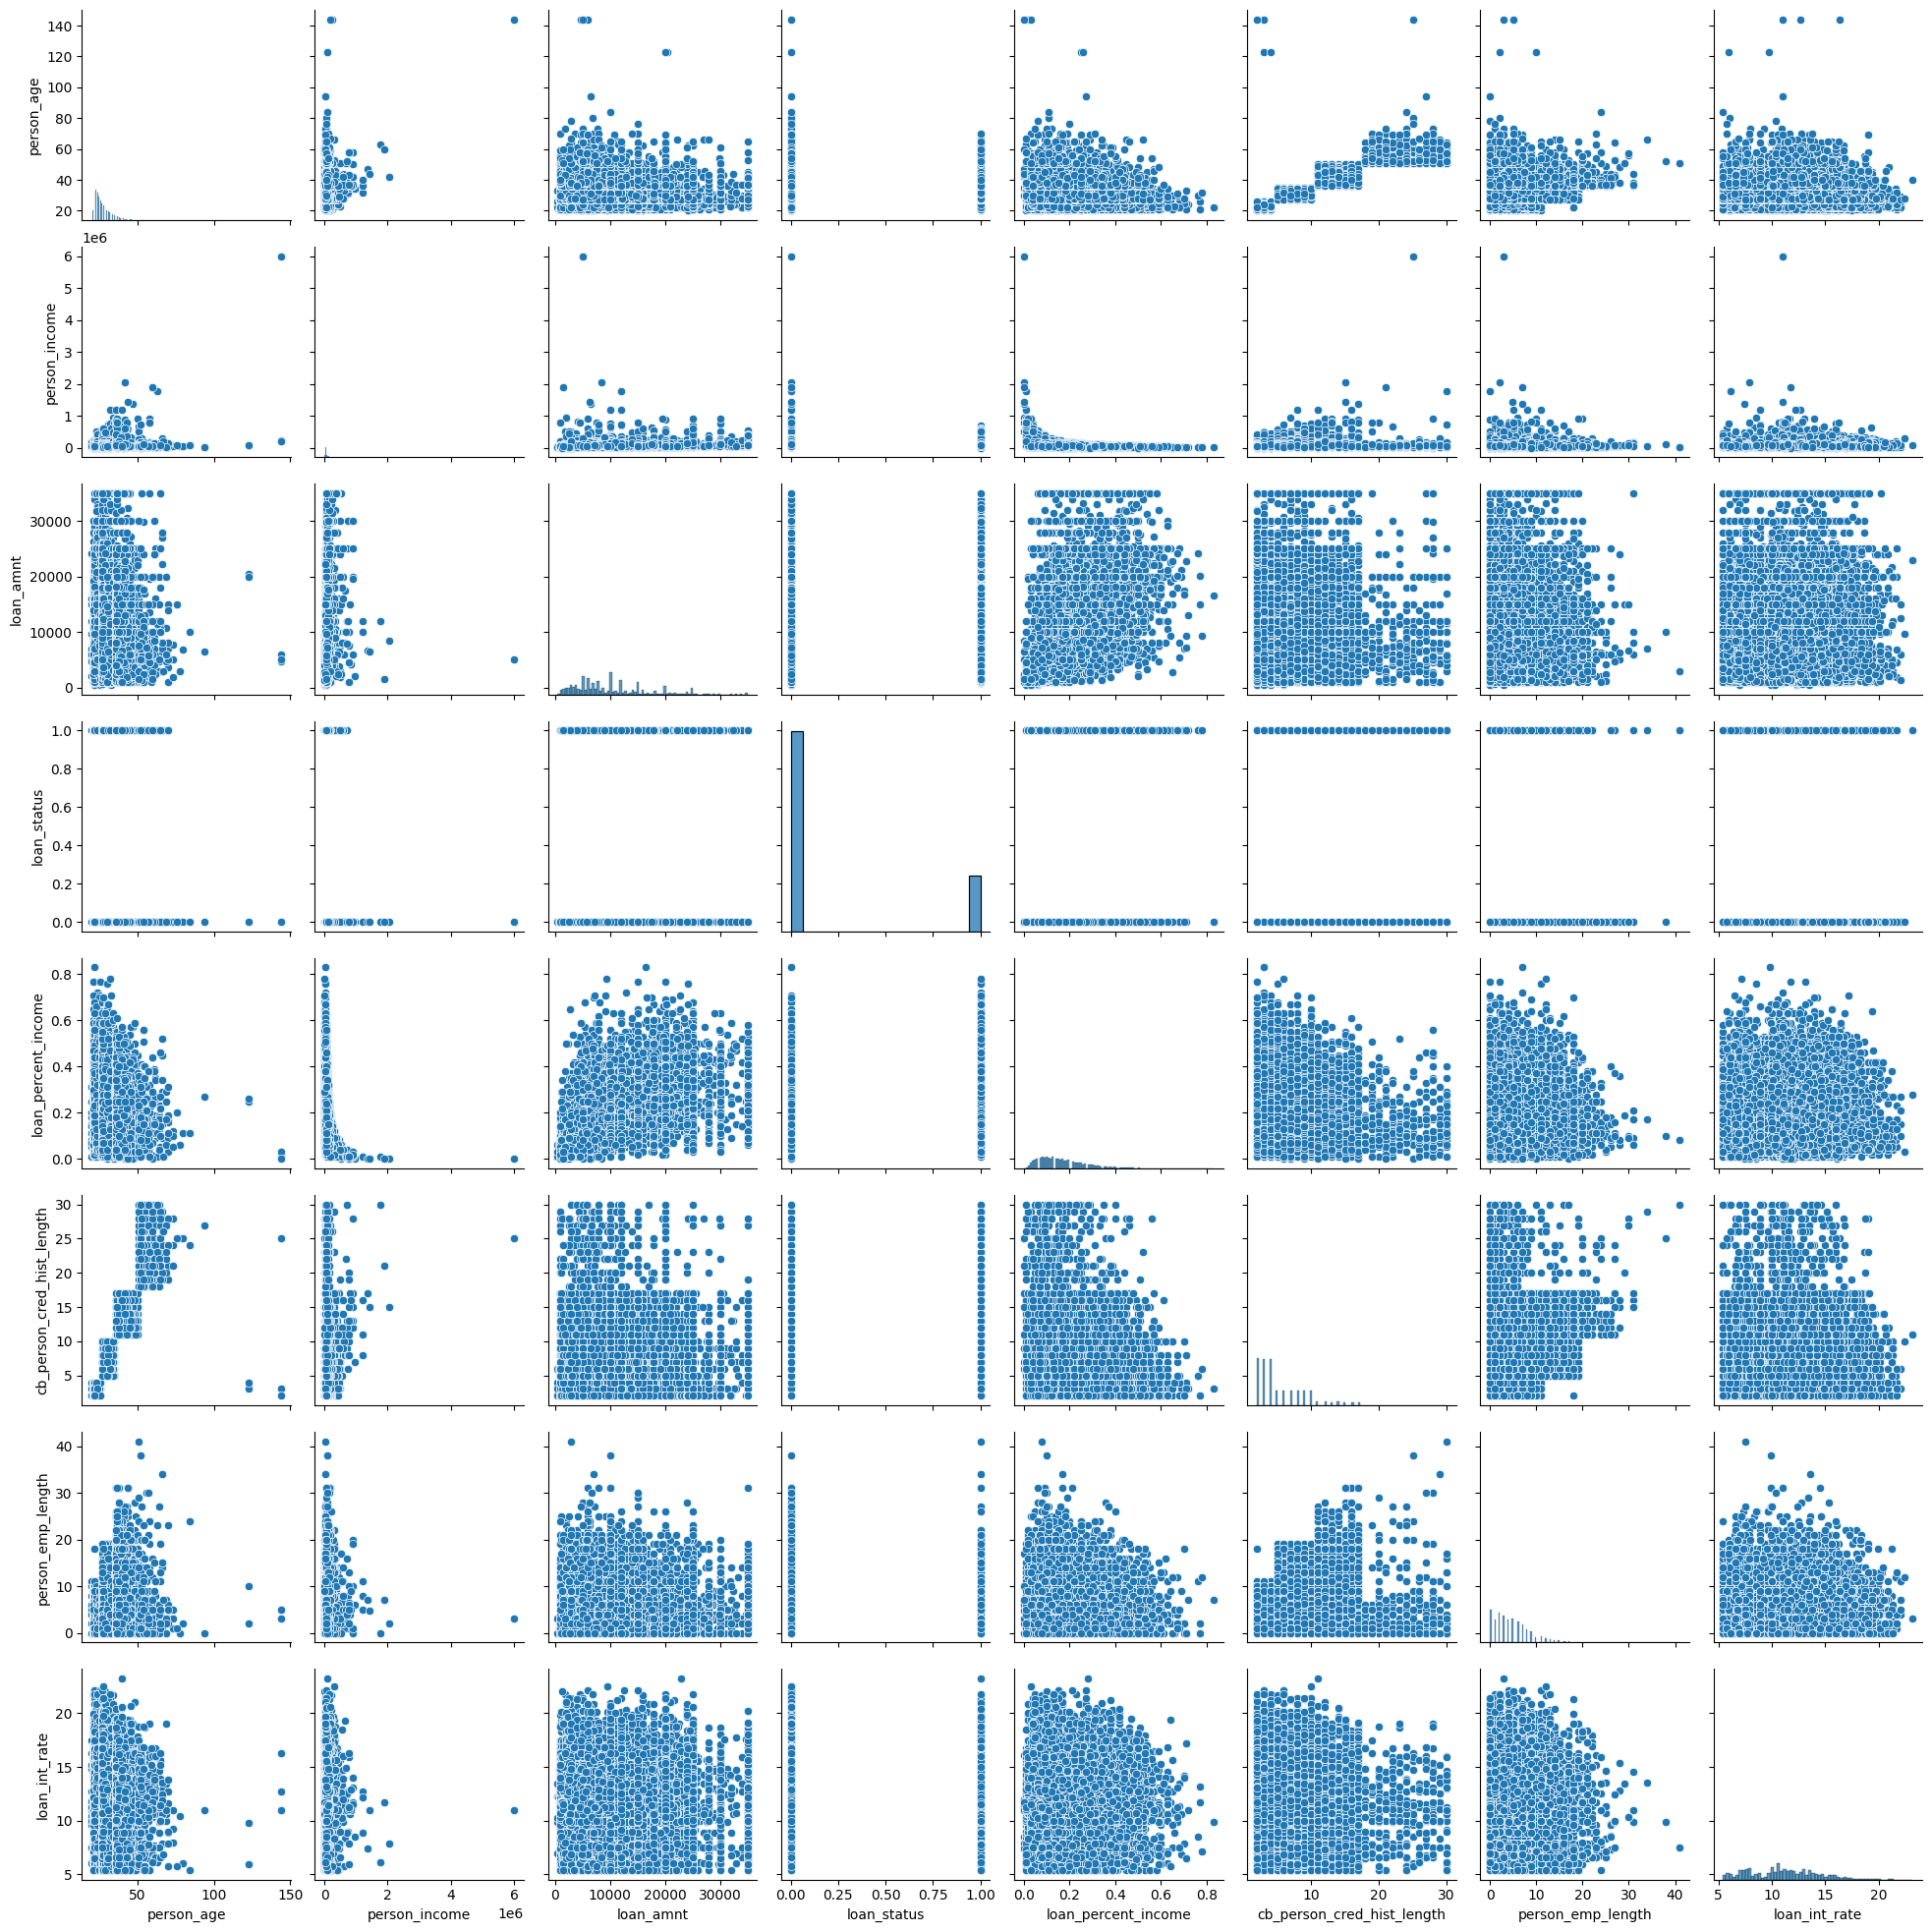

In [ ]:
sns.pairplot(df)

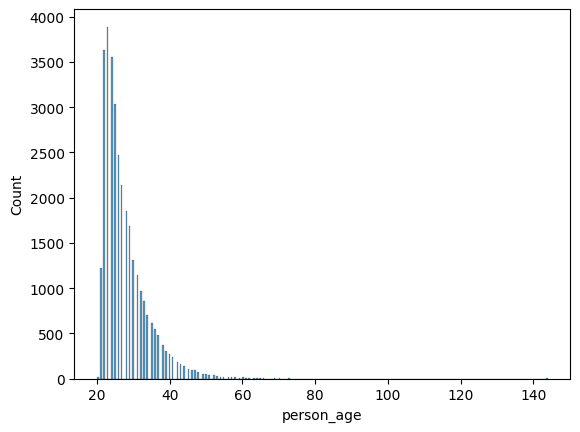

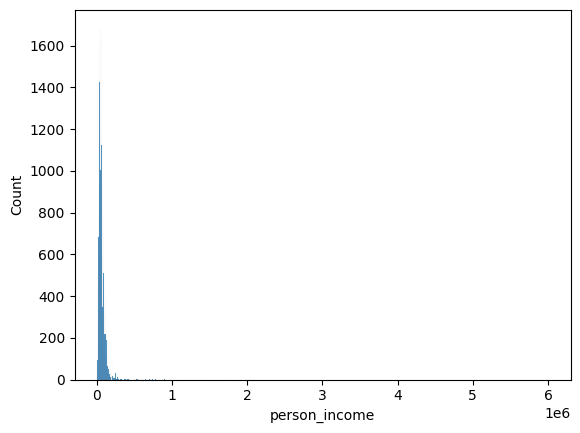

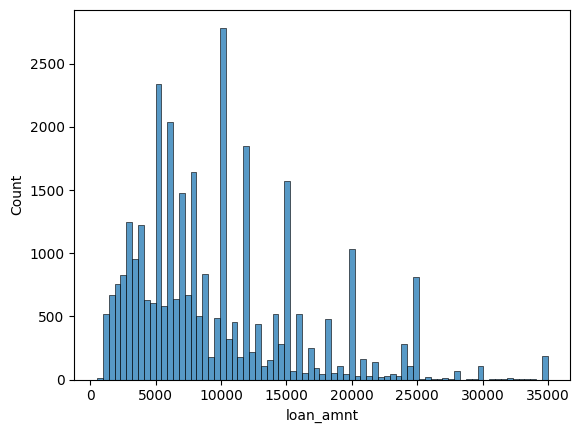

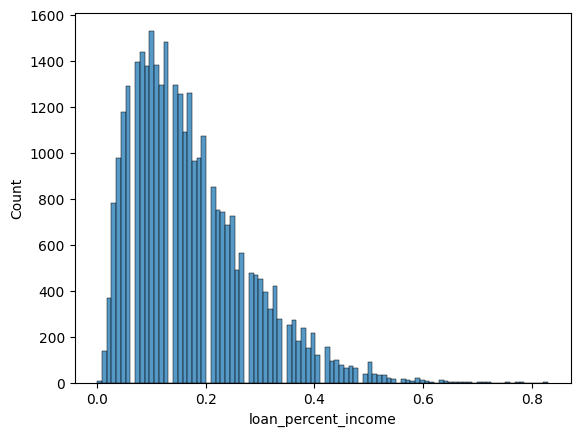

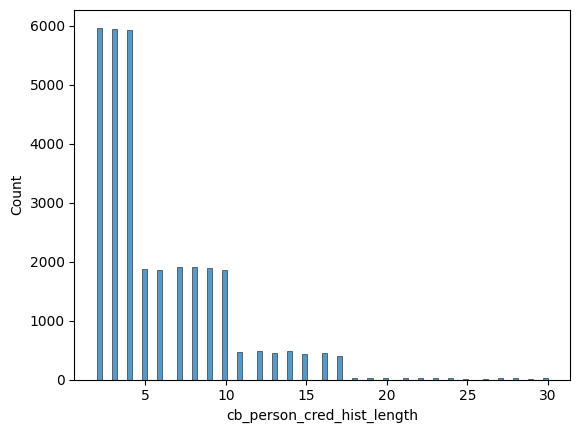

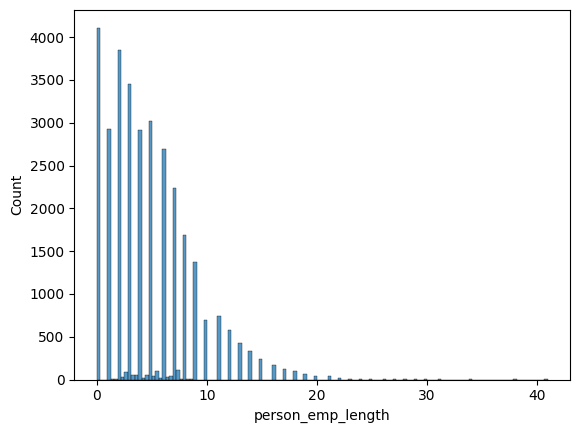

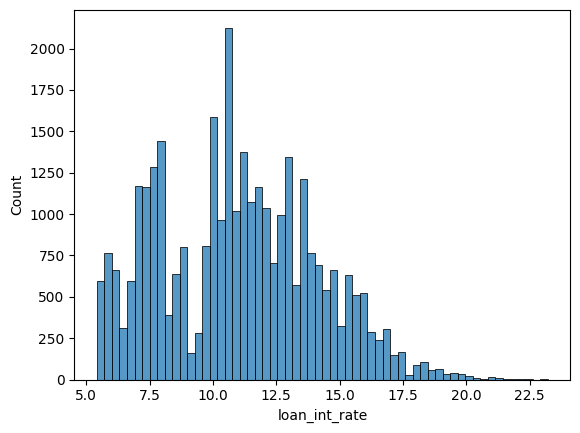

In [ ]:
for num in features_num:
  sns.histplot(df[num])
  plt.show()

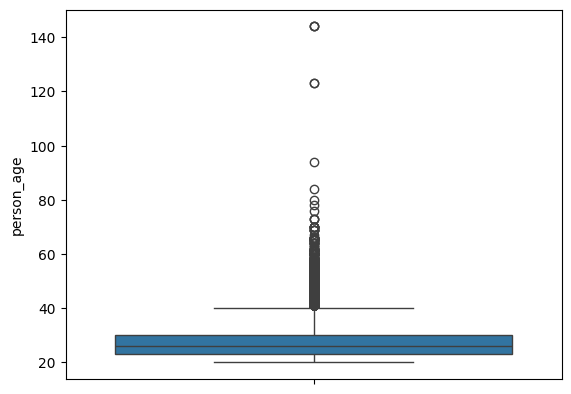

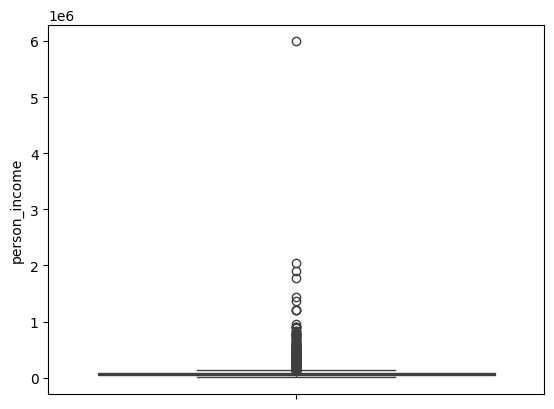

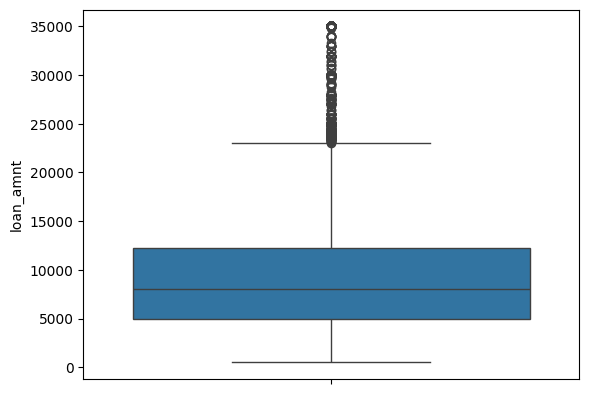

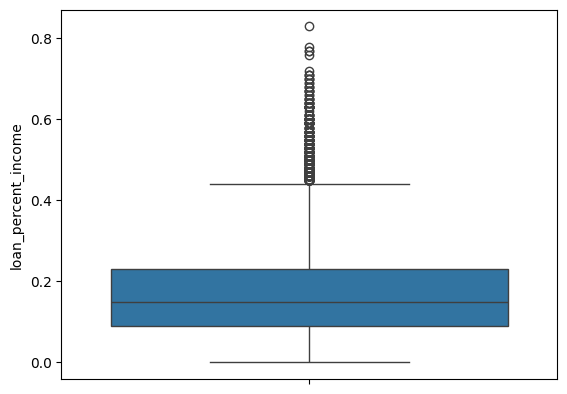

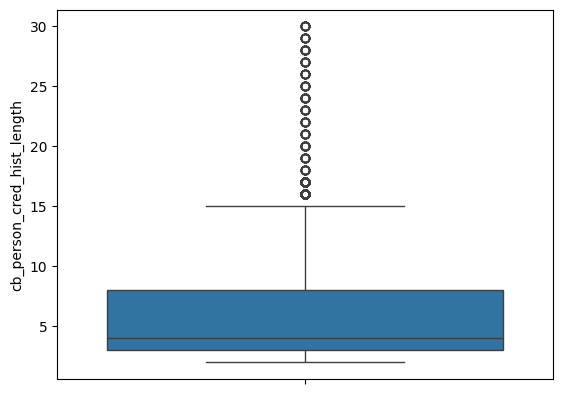

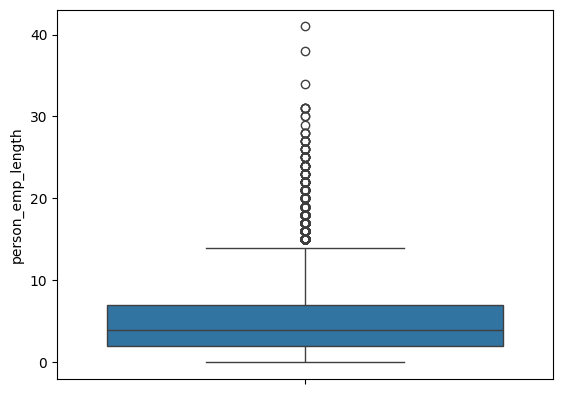

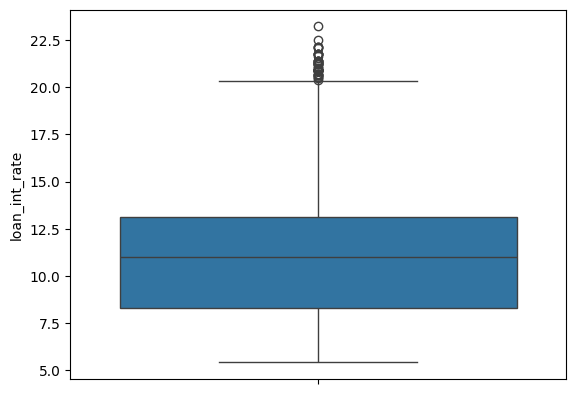

In [ ]:
for num in features_num:
  sns.boxplot(df[num])
  plt.show()

* Person age


In [ ]:
df.person_age.value_counts().sort_index()

,count
person_age,
20.0,15
21.0,1228
22.0,3632
23.0,3889
24.0,3549
25.0,3037
26.0,2477
27.0,2138
28.0,1854


In [ ]:
df = df.drop(df[df.person_age > 65].index)

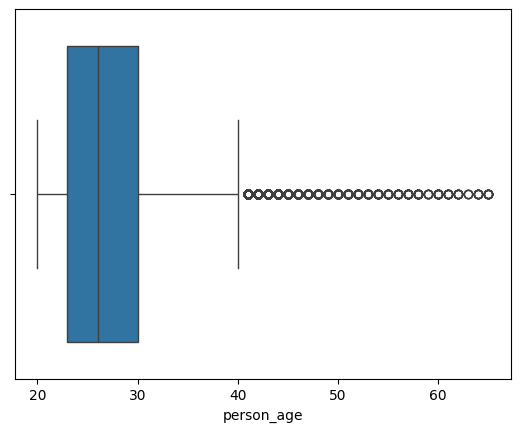

In [ ]:
sns.boxplot(data=df , x= "person_age");

* Person income

In [ ]:
df.person_income.value_counts().sort_index()

,count
person_income,
4000.0,1
4080.0,1
4200.0,2
4800.0,3
4888.0,1
...,...
1362000.0,1
1440000.0,1
1782000.0,1


* loan amount

In [ ]:
df.loan_amnt.value_counts().sort_index()

,count
loan_amnt,
500.0,5
700.0,1
725.0,1
750.0,1
800.0,1
...,...
33250.0,1
33950.0,2
34000.0,4


* loan prct income

In [ ]:
df.loan_percent_income.value_counts().sort_index()

,count
loan_percent_income,
0.00,8
0.01,138
0.02,369
0.03,778
0.04,976
...,...
0.72,1
0.76,1
0.77,2


* cb_preson_cred_hist_length

In [ ]:
df.cb_person_cred_hist_length.value_counts().sort_index()

,count
cb_person_cred_hist_length,
2.0,5964
3.0,5940
4.0,5923
5.0,1881
6.0,1857
7.0,1901
8.0,1902
9.0,1895
10.0,1850


* person emp length

In [ ]:
df.person_emp_length.value_counts().sort_index()

,count
person_emp_length,
0.0,4107
1.0,2922
1.4,2
1.6,10
2.0,3845
...,...
29.0,1
30.0,2
31.0,4


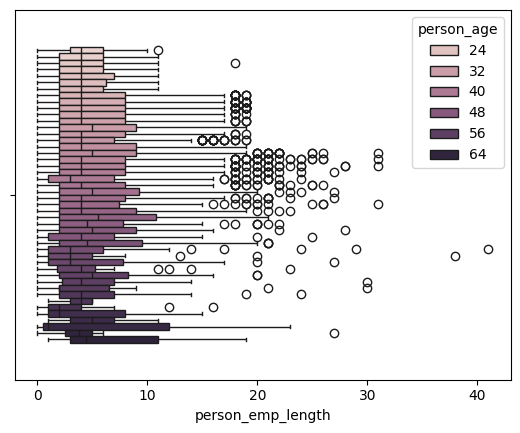

In [ ]:
sns.boxplot(data=df , x= "person_emp_length",hue="person_age");

In [ ]:
df = df.drop(df[df.person_emp_length > 37].index)

* loan int rate

In [ ]:
df.loan_int_rate.value_counts().sort_index()

,count
loan_int_rate,
5.42,593
5.79,393
5.99,357
6.00,11
6.03,448
...,...
21.74,5
22.06,1
22.11,3


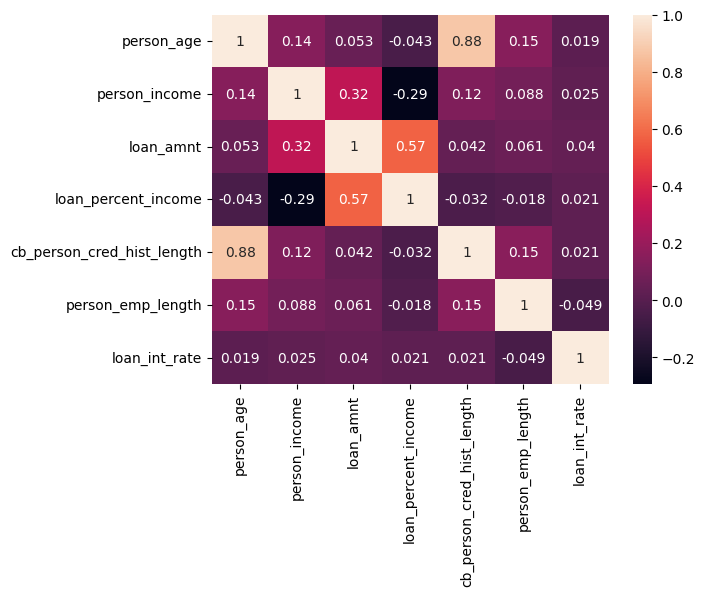

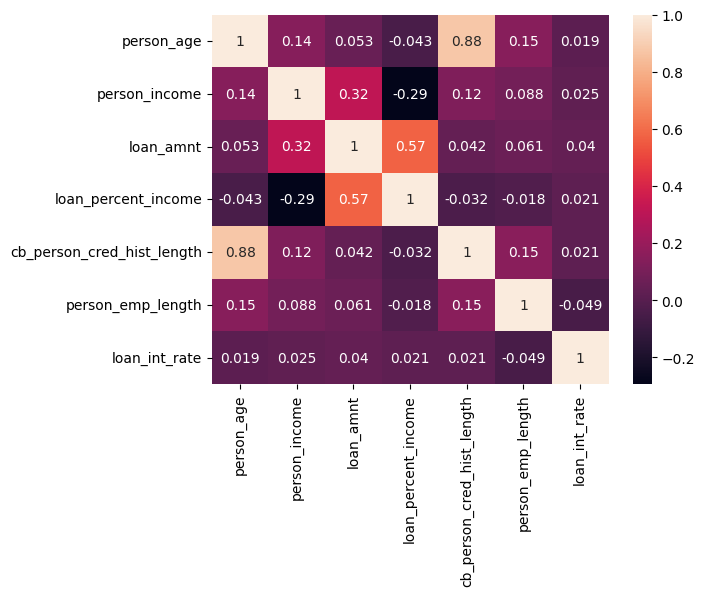

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features]

correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

**division du dataset **

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((26032, 11), (6509, 11), (26032,), (6509,))

((26032, 11), (6509, 11), (26032,), (6509,))

*PREPROCESSING*

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [ ]:
categorical_features = df.select_dtypes(include='object').columns
categorical_features = categorical_features.drop('loan_status')

In [ ]:
encoded_train_parts = []
encoded_test_parts = []

for col in categorical_features:
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
    train_encoded = encoder.fit_transform(X_train[[col]])
    test_encoded = encoder.transform(X_test[[col]])

    # Ajouter les colonnes encodées
    encoded_train_parts.append(train_encoded)
    encoded_test_parts.append(test_encoded)

# Fusionner toutes les colonnes encodées
X_train_cat = pd.concat(encoded_train_parts, axis=1)
X_test_cat = pd.concat(encoded_test_parts, axis=1)

# Fusionner avec les colonnes numériques
X_train_final = pd.concat([X_train[numerical_features], X_train_cat], axis=1)
X_test_final = pd.concat([X_test[numerical_features], X_test_cat], axis=1)


In [ ]:
# Initialiser le scaler
scaler = RobustScaler()

# Appliquer uniquement sur les colonnes numériques
X_train_scaled_num = pd.DataFrame(
    scaler.fit_transform(X_train_final[numerical_features]),
    columns=numerical_features,
    index=X_train_final.index
)

X_test_scaled_num = pd.DataFrame(
    scaler.transform(X_test_final[numerical_features]),
    columns=numerical_features,
    index=X_test_final.index
)

# Remplacer les anciennes colonnes numériques par les versions scalées
X_train_scaled = X_train_final.copy()
X_test_scaled = X_test_final.copy()

X_train_scaled[numerical_features] = X_train_scaled_num
X_test_scaled[numerical_features] = X_test_scaled_num


In [ ]:
y_train.value_counts()

,count
loan_status,
0.0,20372
1.0,5660


In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

* modélisation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier(random_state=42)
RF.fit(X_train_scaled, y_train)
y_pred = RF.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9204178829313259


Demander au prof si c est la bonne demarche

recommencer l etape de preprocessing et modelisation avec des pipeline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Separation features/target


In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status'].astype(int)